# 04 - Visualizações e Insights Visuais - 3º ADM

Este notebook traz visualizações gráficas para facilitar a interpretação dos dados dos alunos.


## 1. Importações e Carregamento de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid", palette="pastel")

# Carregando o DataFrame final
df = pd.read_csv('../data/processed/ranking_alunos.csv')
df = df[~df['Alunos'].isin(['AVANÇADO', 'ADEQUADO', 'BÁSICO', 'ABAIXO DO BÁSICO'])]

## 2. 🎯 Distribuição das Médias Finais

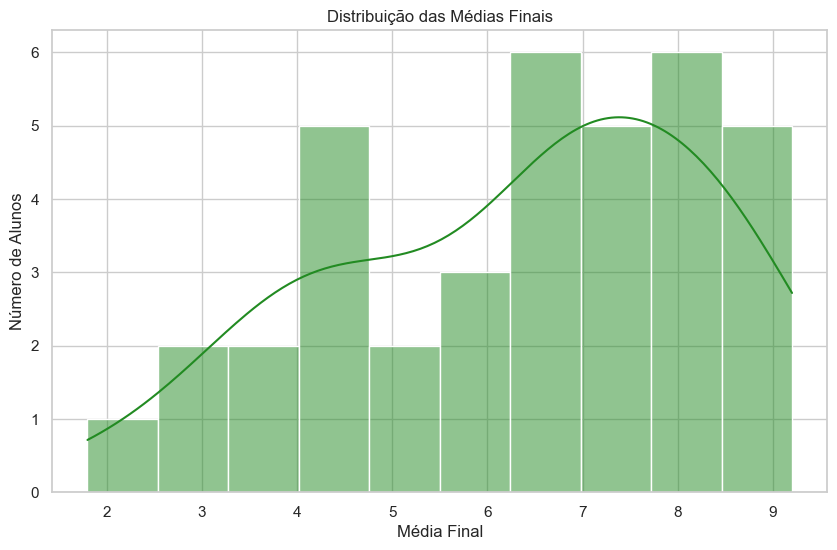

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Média Final'], bins=10, kde=True, color='forestgreen')
plt.title('Distribuição das Médias Finais')
plt.xlabel('Média Final')
plt.ylabel('Número de Alunos')
plt.show()

## 3. 🥇 Top 10 Alunos com Melhores Médias

C:\Users\kmila\AppData\Local\Temp\ipykernel_1552\2155396802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Média Final', y='Alunos', data=top_medias, palette='YlGn_r')


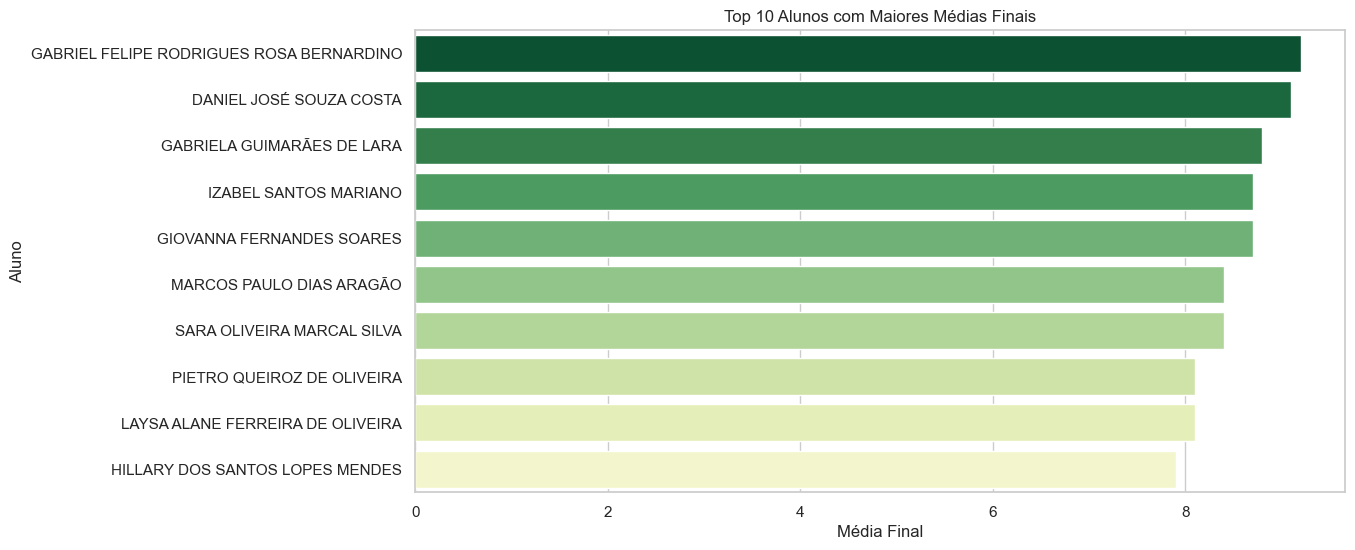

In [22]:
top_medias = df.sort_values(by='Média Final', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Média Final', y='Alunos', data=top_medias, palette='YlGn_r')
plt.title('Top 10 Alunos com Maiores Médias Finais')
plt.xlabel('Média Final')
plt.ylabel('Aluno')
plt.show()

## 4. 🏆 Alunos com Mais Notas 10

C:\Users\kmila\AppData\Local\Temp\ipykernel_1552\1331146025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_10', y='Alunos', data=top_10_notas10, palette='Greens_r')


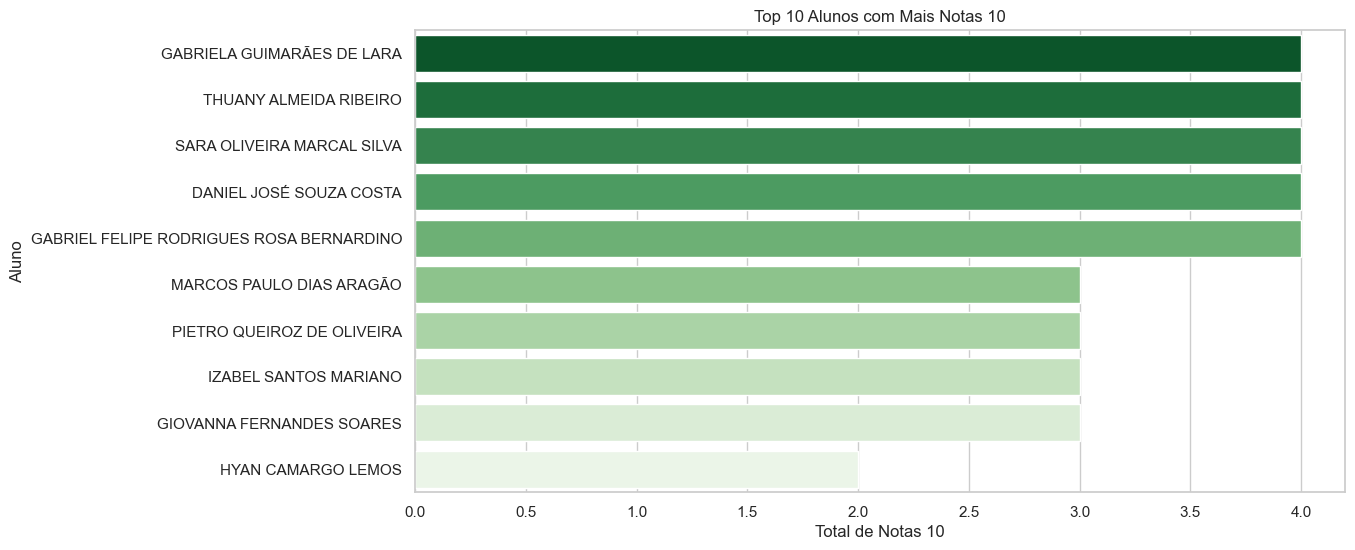

In [23]:
# Conta quantas notas 10 cada aluno teve
notas_10 = df.drop(columns=['Alunos', 'Média Final']).apply(lambda x: x == 10).sum(axis=1)
df['Total_10'] = notas_10

top_10_notas10 = df.sort_values(by='Total_10', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_10', y='Alunos', data=top_10_notas10, palette='Greens_r')
plt.title('Top 10 Alunos com Mais Notas 10')
plt.xlabel('Total de Notas 10')
plt.ylabel('Aluno')
plt.show()

## 5. 📚 Desempenho Médio por Disciplina

C:\Users\kmila\AppData\Local\Temp\ipykernel_1552\1921200712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_disciplinas.values, y=media_disciplinas.index, palette='YlGn_r')


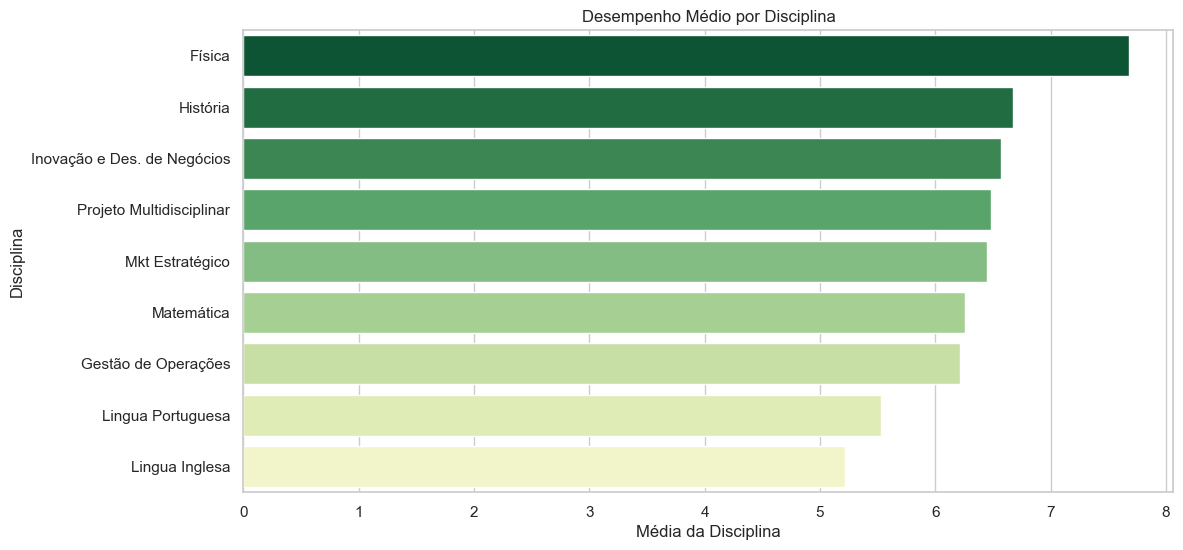

In [24]:
disciplinas = df.drop(columns=['Alunos', 'Média Final', 'Total_10'])
media_disciplinas = disciplinas.mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=media_disciplinas.values, y=media_disciplinas.index, palette='YlGn_r')
plt.title('Desempenho Médio por Disciplina')
plt.xlabel('Média da Disciplina')
plt.ylabel('Disciplina')
plt.show()

## 6. 📈 Evolução do Desempenho por Disciplinas (Boxplot)

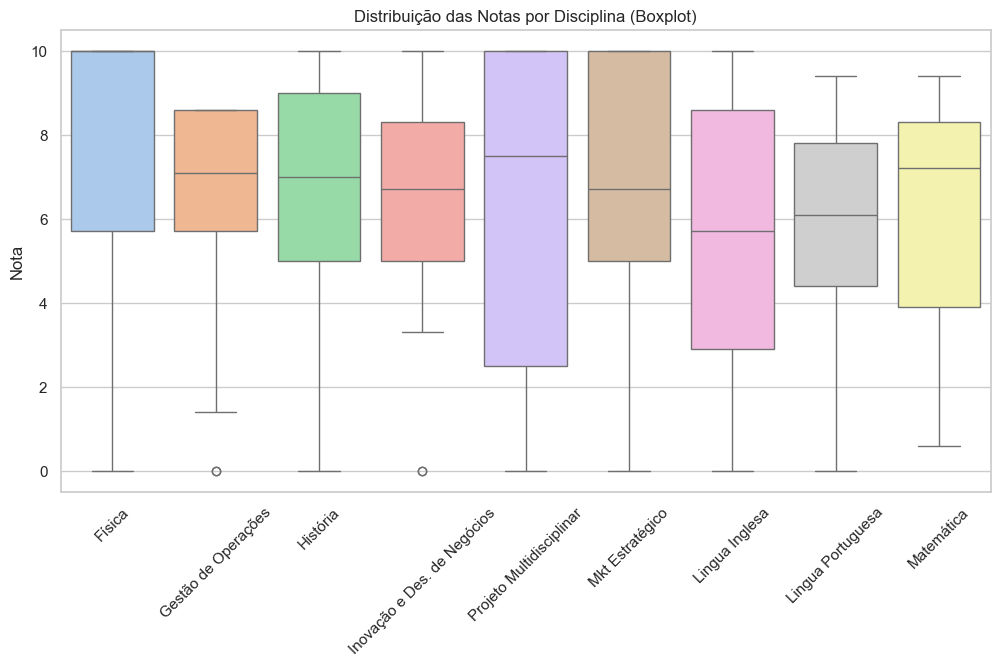

In [6]:
plt.figure(figsize=(12, 6))
disciplinas = df.drop(columns=['Alunos', 'Média Final', 'Total_10'])
sns.boxplot(data=disciplinas)
plt.xticks(rotation=45)
plt.title('Distribuição das Notas por Disciplina (Boxplot)')
plt.ylabel('Nota')
plt.show()

## 7. 🔥 Correlação entre Disciplinas (Heatmap)

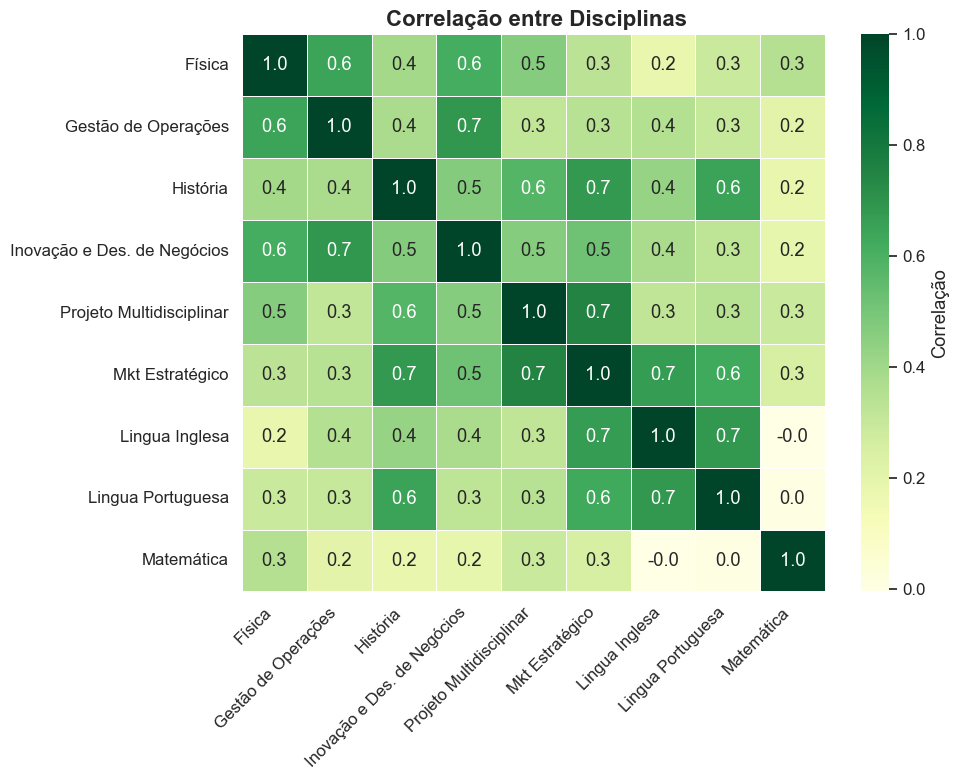

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aumenta a escala da fonte
sns.set(font_scale=1.1)

# Cria o gráfico
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    disciplinas.corr(),         # seu DataFrame de correlação
    annot=True,                 # escreve os valores nas células
    fmt=".1f",                  # formatação dos números
    cmap="YlGn",                # paleta semelhante à da imagem
    linewidths=0.5,             # linhas entre os quadrados
    linecolor='white',
    cbar_kws={'label': 'Correlação'}  # rótulo da barra de cores
)

# Título e ajustes de layout
plt.title(" Correlação entre Disciplinas", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. 🧮 Proporção de Alunos por Faixa de Média (Gráfico de Pizza)

### Mostra quantos alunos estão em cada faixa de média (ex.: <5, entre 5 e 7, >7).

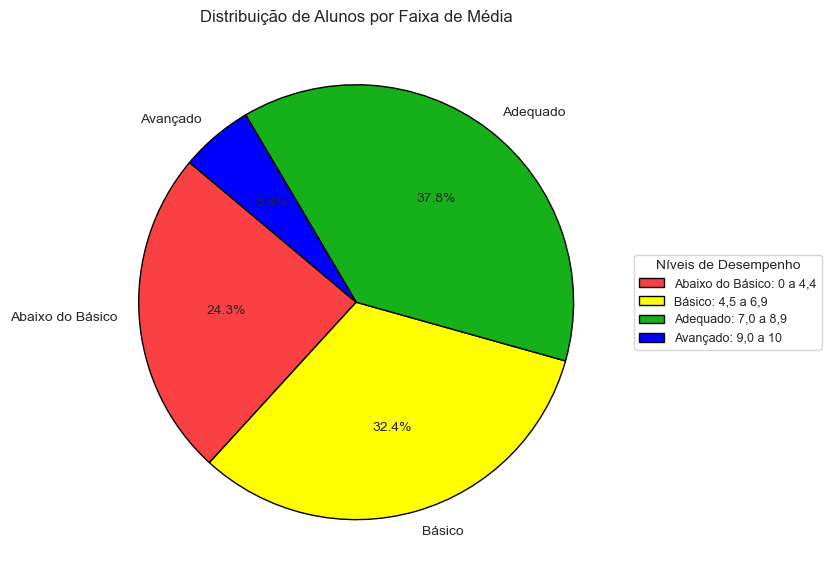

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Classifica as médias nas faixas definidas
faixas = pd.cut(
    df['Média Final'],
    bins=[0, 4.4, 6.9, 8.9, 10],
    labels=['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado']
)

# Conta a quantidade de alunos em cada faixa
contagem = faixas.value_counts().sort_index()

# Cores personalizadas para cada faixa
colors = ['#f94144', '#FFFF00', '#15B01A', '#0000ff']  # vermelho, laranja, amarelo, verde

# Criação do gráfico
plt.figure(figsize=(8, 6))  # Gráfico menor
wedges, texts, autotexts = plt.pie(
    contagem,
    labels=contagem.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Ajusta o tamanho das legendas automáticas
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)

# Legenda explicativa ao lado
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title='Níveis de Desempenho',
    labels=[
        'Abaixo do Básico: 0 a 4,4',
        'Básico: 4,5 a 6,9',
        'Adequado: 7,0 a 8,9',
        'Avançado: 9,0 a 10'
    ],
    fontsize=9,
    title_fontsize=10
)

plt.title('Distribuição de Alunos por Faixa de Média', fontsize=12)
plt.tight_layout()
plt.show()

## 📌 Radar Chart: Comparativo de Desempenho por Disciplinas

### ✅ O que esse gráfico mostra:
Cada raio representa uma disciplina.

O gráfico mostra o desempenho relativo do aluno em cada uma delas.

Permite identificar pontos fortes e fracos com clareza.

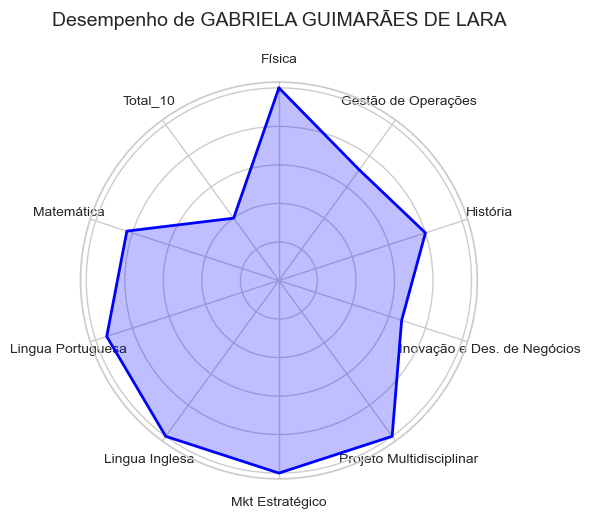

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Função para gerar radar chart de um aluno
def radar_chart_aluno(df, nome_aluno):
    # Verifica se o aluno está presente
    if nome_aluno not in df['Alunos'].values:
        print(f'Aluno "{nome_aluno}" não encontrado.')
        return

    # Seleciona as disciplinas (excluindo colunas como 'Alunos' e 'Média Final')
    colunas_disciplinas = df.columns.drop(['Alunos', 'Média Final'])

    # Obtém os dados do aluno
    dados_aluno = df[df['Alunos'] == nome_aluno][colunas_disciplinas].values.flatten().tolist()

    # Número de variáveis
    num_var = len(colunas_disciplinas)

    # Criação dos ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_var, endpoint=False).tolist()
    dados_aluno += dados_aluno[:1]
    angles += angles[:1]

    # Criação da figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plotagem
    ax.plot(angles, dados_aluno, color='blue', linewidth=2, linestyle='solid')
    ax.fill(angles, dados_aluno, color='blue', alpha=0.25)

    # Configurações
    ax.set_title(f'Desempenho de {nome_aluno}', size=14, pad=20)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Rótulos
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(colunas_disciplinas, size=10)

    ax.set_yticklabels([])  # Remove os valores do eixo radial

    plt.tight_layout()
    plt.show()

# Exemplo de uso
nome = 'GABRIELA GUIMARÃES DE LARA'  # Substitua pelo nome desejado
radar_chart_aluno(df, nome)

## 10. 📉 Alunos com Menor Desempenho

### Mostra os 10 piores alunos por média final.

C:\Users\kmila\AppData\Local\Temp\ipykernel_1552\931149075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Média Final', y='Alunos', data=bottom10, palette='YlGn')


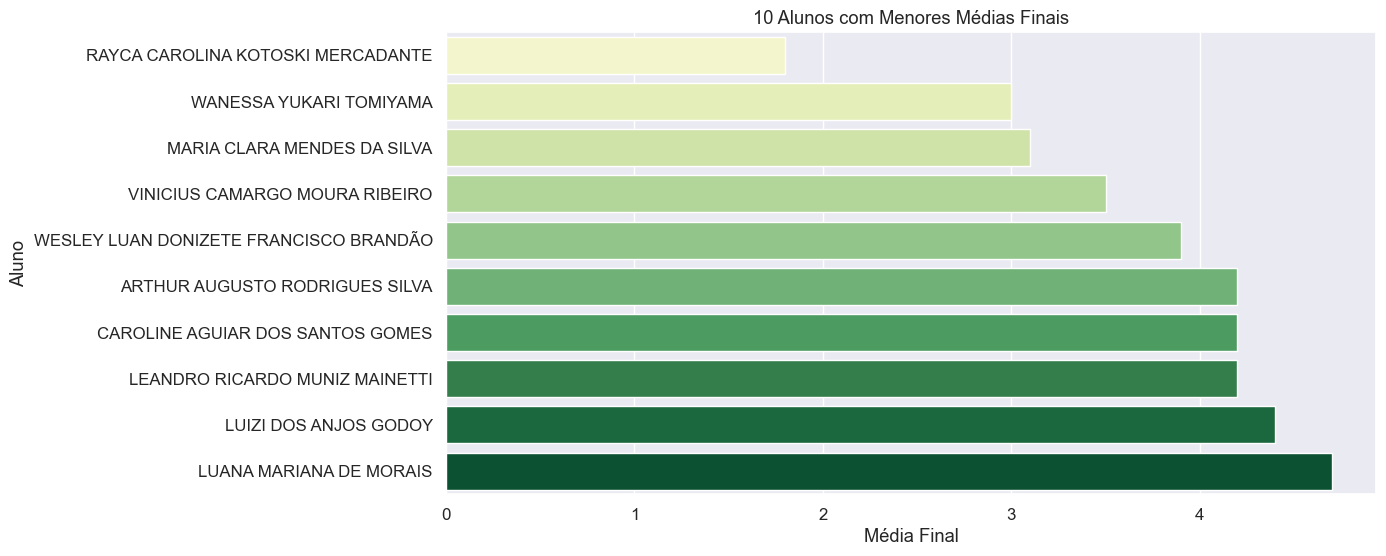

In [34]:
bottom10 = df.sort_values(by='Média Final').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Média Final', y='Alunos', data=bottom10, palette='YlGn')
plt.title('10 Alunos com Menores Médias Finais')
plt.xlabel('Média Final')
plt.ylabel('Aluno')
plt.show()